<a href="https://colab.research.google.com/github/niqolla/LigandMapper.py/blob/main/4_Path_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [ ]:
# clsutering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# random forests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

## 1) Describe.

Describe the data set

In [ ]:
# load the iris dataset
iris = load_iris()

# create a pandas DataFrame with the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# add a column for the target variable (the class of the iris)
df['sp'] = iris.target_names[iris.target]

# map the names to the values of the species
df['sp'] = df['sp'].map({'setosa': 0, 'versicolor':1 , 'virginica':2})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sp
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.to_csv('iris.csv', index=False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
sp,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


> There seems to be an overall 'good' distribution - no outliers, no null values - no need to remove rows or cap fields.

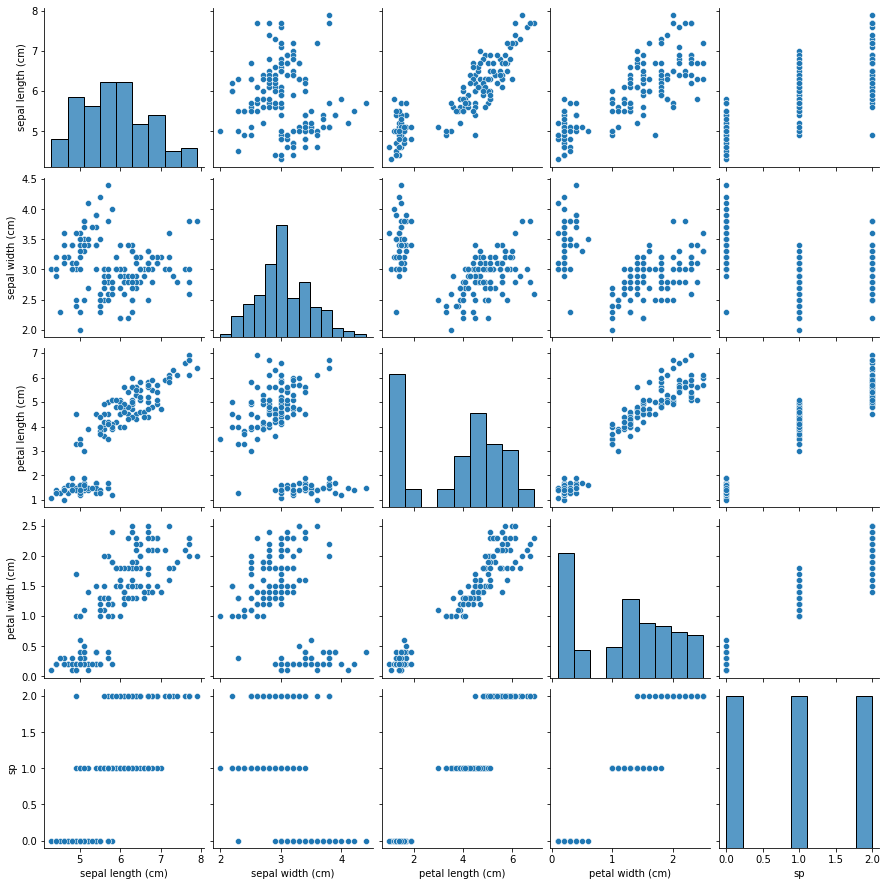

In [ ]:
sns.pairplot(df)

> Sepal length and Sepal width follow a normal ditribtion. Petal length and petal width have an unusuall distribution, but I believe this is a result of having all 3 species inside the column - I think if we look at any variable for the different species individually, we would find that they have a normal distribution. 

> Finally, looking at the pairplots containing the species, we can see that the 3 species form well defined groups and ranges for the different variables.

## 2)  PyMC models
Using pyMC3, we want to infer the parameters of the following models:


> Quickly creating a model with sklearn to get a sence of the values for the parameters

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
Y = df[['petal width (cm)']]

sk_reg_model = LinearRegression()
sk_reg_model.fit(X=X, y=Y)

print('Alpha: ', sk_reg_model.intercept_)
print('Coefs: ', sk_reg_model.coef_)

Alpha:  [-0.24030739]
Coefs:  [[-0.20726607  0.22282854  0.52408311]]


### a) Mean and Std
The mean and standard deviation of the distribution of one feature chosen by
you, that we assume as normally distributed.

In [ ]:
# import pymc as pm

In [ ]:
## CREATING THE MODEL:

# with pm.Model() as mean_sigma_model:
#     mean = pm.Normal('mean', mu=6, sigma=1)
#     sigma = pm.Normal('sigma', mu=2, sigma=10)
#     observations = pm.Normal('obs', mean, sigma, observed=df['sepal length (cm)'])
#     trace_mean_sigma = pm.sample(30000, tune=5000, step=pm.Metropolis())

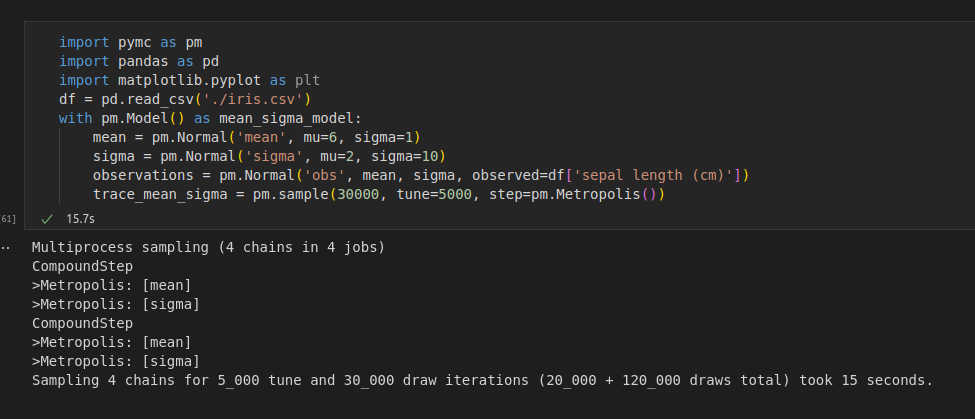

In [ ]:
## PLOTTIN THE TRACE TO SEE IF THE VALUES CONVERGE

# pm.plot_trace(trace_mean_sigma)      # OR:  
# pm.traceplot(trace_mean_sigma)       # <- depricated in pymc

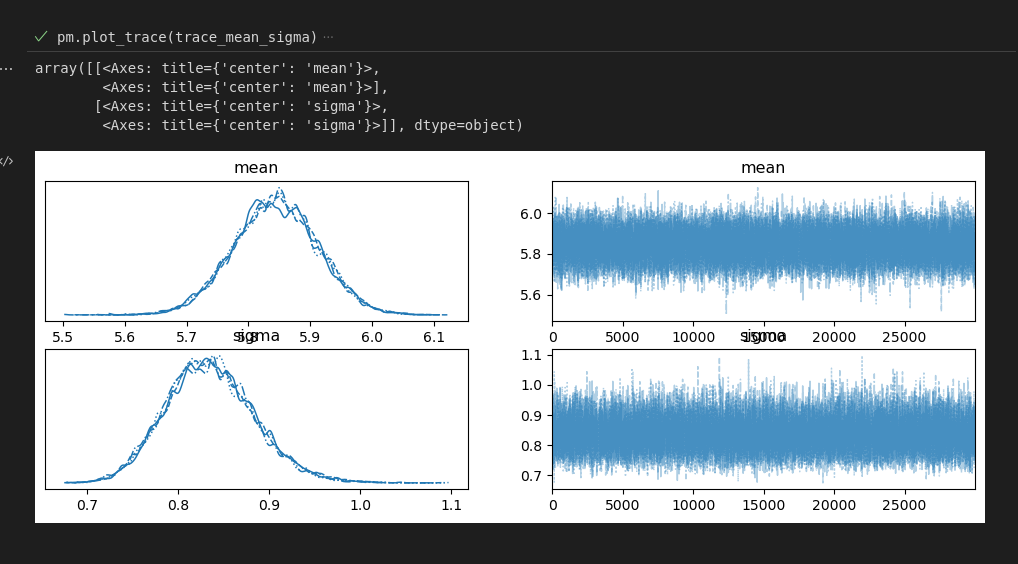

In [ ]:
## LOOKING AT THE POSTERIOR DISTRIBUTION OF THE VALUES

# pm.plot_posterior(trace_mean_sigma)

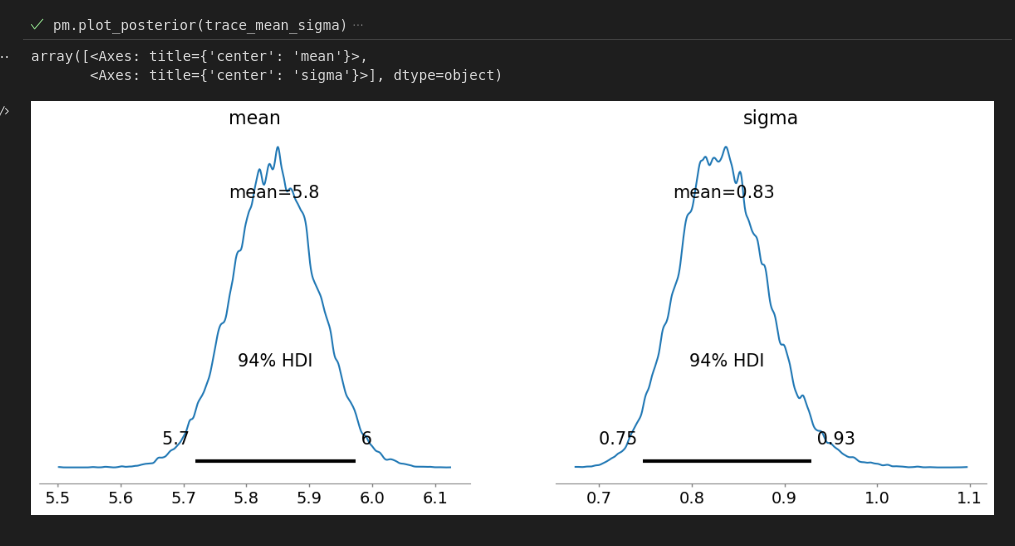

> This field has a mean of 5.8 and a variance of 0.83, which makes sence given it's distribution.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

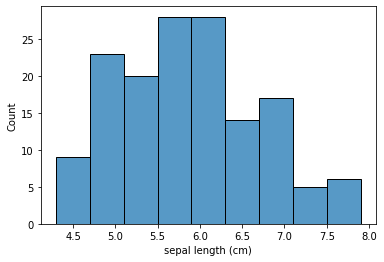

In [ ]:
sns.histplot(df['sepal length (cm)'])

### b) Regression model
The Petal Width as linear function of the other three features.

In [ ]:
## CREATING THE MODEL:

# with pm.Model() as regression_model:
#     alpha = pm.Normal('alpha', mu=0, sigma=10)
#     beta1 = pm.Normal('beta1', mu=0, sigma=10)
#     beta2 = pm.Normal('beta2', mu=0, sigma=10)
#     beta3 = pm.Normal('beta3', mu=0, sigma=10)
 
#     mu = alpha + beta1*df['petal length (cm)'] + beta2*df['sepal width (cm)'] + beta3*df['sepal length (cm)']
#     sigma = pm.HalfNormal('sigma', sigma=10)

#     y = pm.Normal('observations', mu=mu, sigma=sigma, observed=df['petal width (cm)'])

#     trace_reg = pm.sample(30000, tune=5000, step=pm.Metropolis())


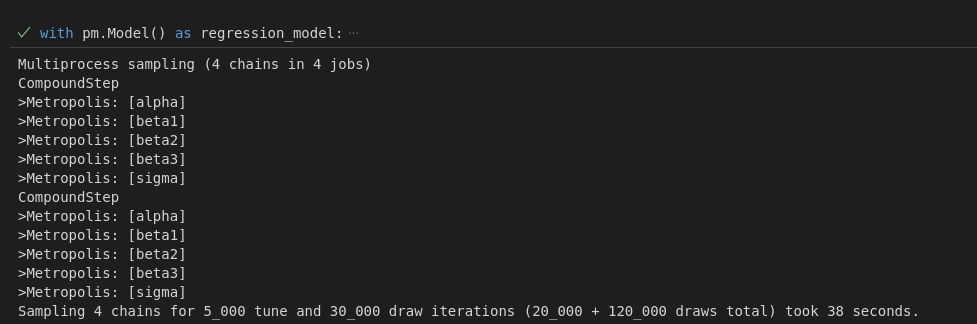

In [ ]:
## LOOKING AT THE TRACE

# pm.plot_trace(trace_reg)

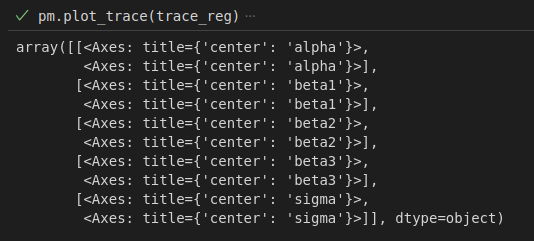

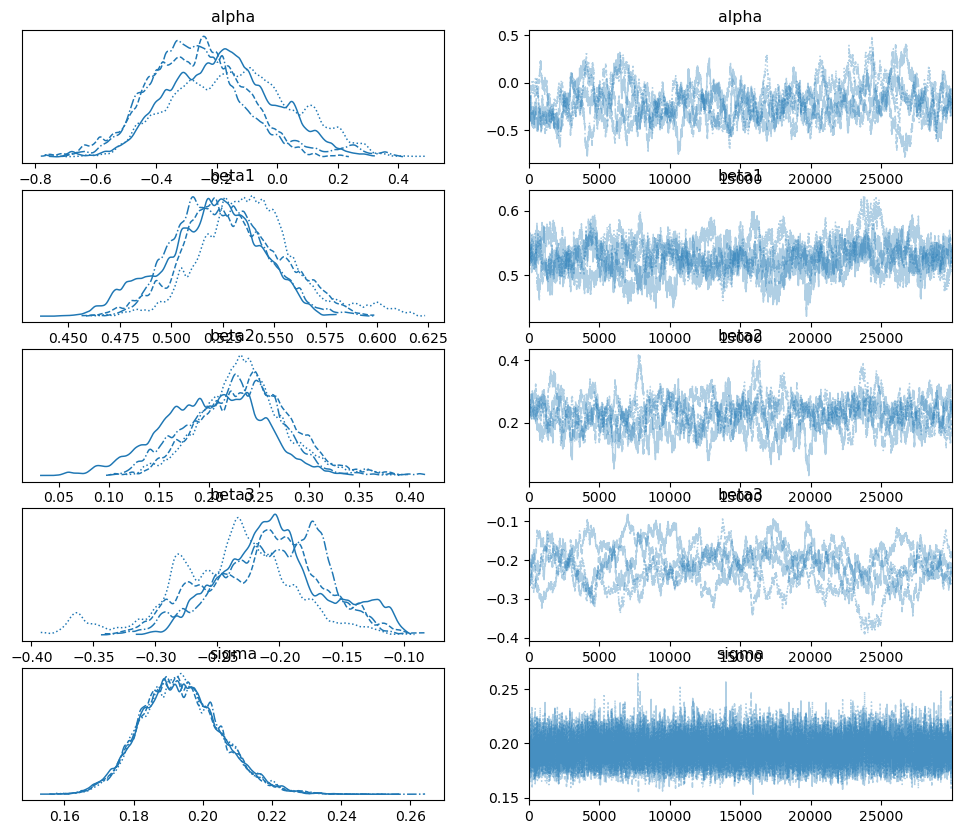

In [ ]:
## LOOKING AT THE POSTERIOR DISTRIBUTION OF THE PARAMETERS

# pm.plot_posterior(trace_reg)

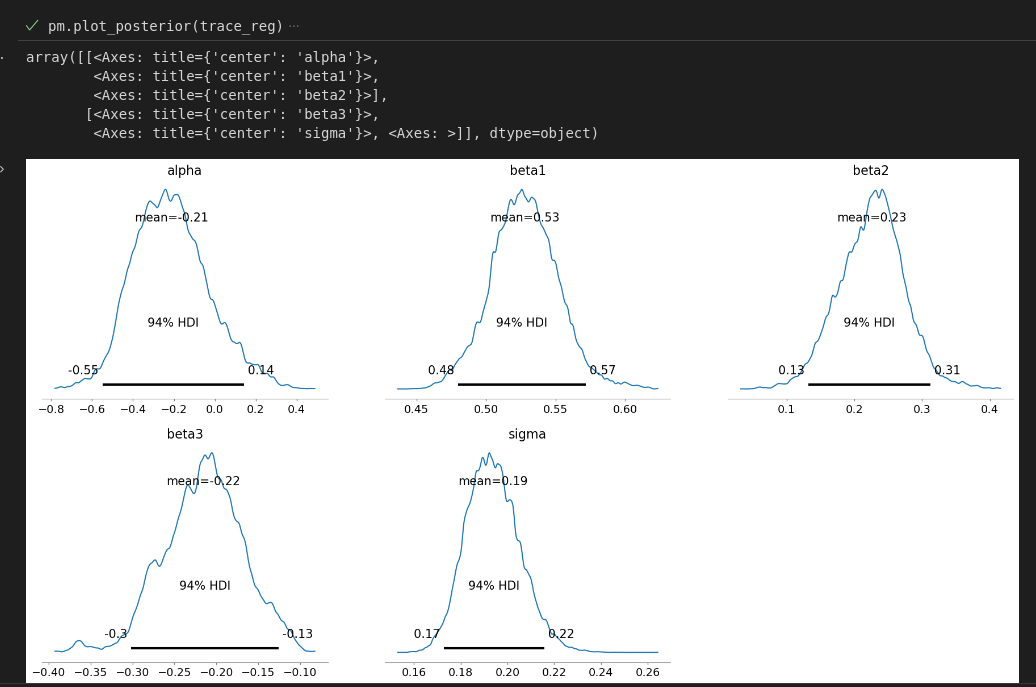

In [ ]:
## CREATING VARIABLES TO STORE THE COEFFICIENTS

# alpha = float(trace_reg.posterior.mean()['alpha'])
# beta1 = float(trace_reg.posterior.mean()['beta1'])
# beta2 = float(trace_reg.posterior.mean()['beta2'])
# beta3 = float(trace_reg.posterior.mean()['beta3'])

In [ ]:
## MAKING PREDICTIONS FOR petal width WITH THE DATA OF petal length, sepal width,  AND sepal length

# predictions = alpha + beta1*df['petal length (cm)'] + beta2*df['sepal width (cm)'] + beta3*df['sepal length (cm)']

In [ ]:
## PLOTTING THE OBSERVED VS. THE PREDICTED DATA

# plt.scatter(x=df['petal width (cm)'], y=predictions)
# plt.xlabel('Observed')
# plt.ylabel('Predicted')
# plt.show()

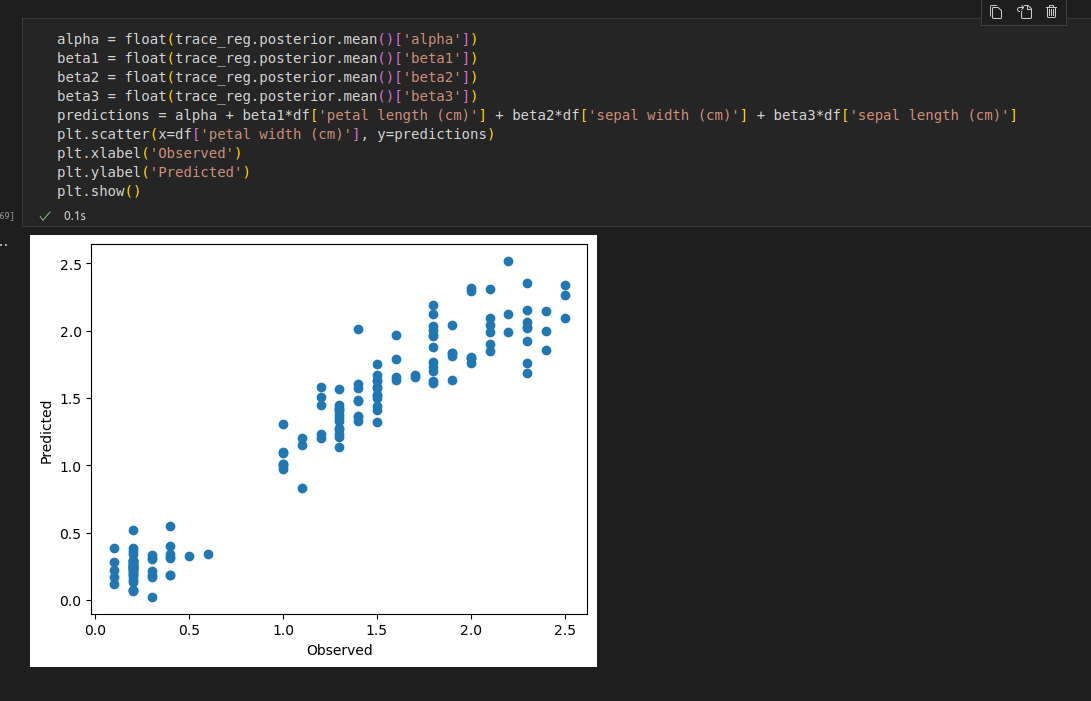

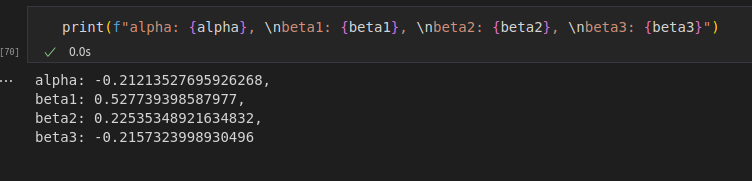

> The model seems to be doing a good job of predicting the petal width. The model is as follows:

> $ Petal Width = α + β_1*PetalLength + β_2*Sepal Width + β_3*Sepal Length $

> $ Petal Width = -0.21 + 0.53*PetalLength + 0.26*Sepal Width - 0.22*Sepal Length $


##3) Clustering

Clusterize the plants according to its features and analyze the results of the clusters
as indication of the type of plant.

> Here, I will do a KMeans and a Hierachical clustering and later compare their performance.

### KMeans

In [ ]:
# Selecting features to cluster on
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values

In [ ]:
# Performing KMeans clustering
kmeans = KMeans(random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [ ]:
# Determining the optimal number of clusters using silhouette score
max_clusters = 10
silhouette_scores = []
for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

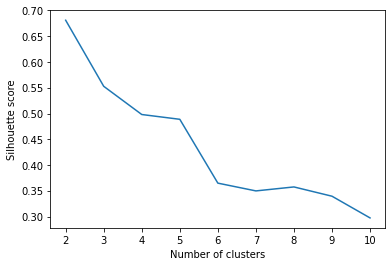

In [ ]:
# Plotting the silhouette scores for each number of clusters
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# choose the number of clusters with highest silhouette score
n_clusters = np.argmax(silhouette_scores) + 2
print('Optimal number of clusters for KMeans:', n_clusters)

# perform KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

Optimal number of clusters for KMeans: 2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


> The silhouette score says that the optimal number of clusters is 2, however I will use 3 because later I want to compare the clusters to the species.

### Hierarchical

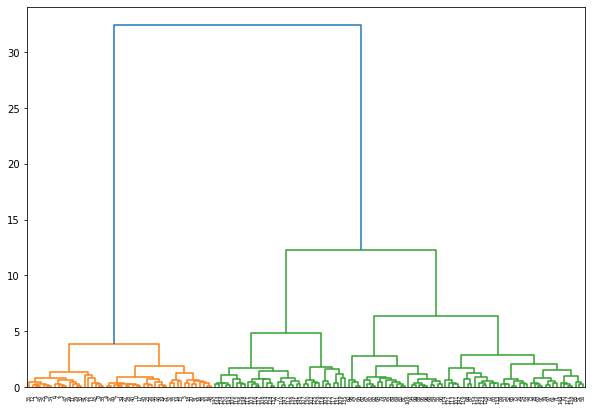

In [ ]:
# perform hierarchical clustering
linkage_matrix = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.show()

In [ ]:
# determine the optimal number of clusters using silhouette score
max_clusters = 10
silhouette_scores = []
for n_clusters in range(2, max_clusters+1):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg.fit(X)
    labels = agg.labels_
    silhouette_scores.append(silhouette_score(X, labels))

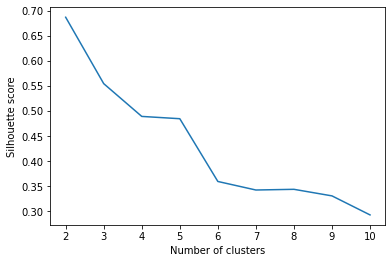

In [ ]:
# plot silhouette scores for each number of clusters
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# choose the number of clusters with highest silhouette score
n_clusters = np.argmax(silhouette_scores) + 2
print('Optimal number of clusters for hierarchical clustering:', n_clusters)

# perform hierarchical clustering with optimal number of clusters
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg.fit(X)
labels_agg = agg.labels_

Optimal number of clusters for hierarchical clustering: 2


> Here again, the silhouette score says that the optimal number of clusters is 2, however I will use 3.



### Comapring the models

In [ ]:
# add cluster labels to DataFrame
df['KMeans'] = labels_kmeans
df['Agglomerative'] = labels_agg

In [ ]:
display(pd.DataFrame(df.groupby(['sp', 'KMeans']).size()))

0
sp KMeans    
0  1       50
1  0       48
   2        2
2  0       14
   2       36

> The KMeans model perfectly clusters species 0 into it's own cluster (1). For species 1 it clusters wrongly only 2 samples into the cluster in which most are species 2 (cluster 2). And for species 2 it has the worst performance.

In [ ]:
display(pd.DataFrame(df.groupby(['sp', 'Agglomerative']).size()))

0
sp Agglomerative    
0  1              50
1  0              49
   2               1
2  0              15
   2              35

> The Hierarchical model perfectly clusters species 0 too. For species 1 it clusters wrongly only 1 sample into the cluster in which most are species 2 (cluster 2). And for species 2 it has the worst performance, like the KMeans clustering.

##4) Random Forest 
Use a random forest classification and express which is the importance of each
feature to infer the type of plant.

In [ ]:
# Step 1: Define the features and target variables
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target = 'sp'

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Step 3: Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Step 4: Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Use the trained classifier to predict the target variable for the testing data
y_pred = clf.predict(X_test)

In [ ]:
# Step 6: Evaluate the performance of the classifier using metrics such as accuracy, precision, and recall
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


> NOTE: this high accuracy, precision migth be a result of overfitting the model. Perhaprs, it would be better to use 1, 2 or 3 variables for training so that the model would not be overfit.

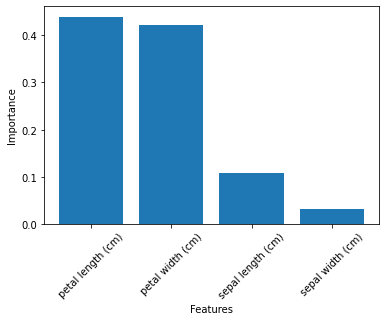

In [ ]:
# Step 7: Visualize the importance of each feature using a bar chart
importance = clf.feature_importances_
indices = np.argsort(importance)[::-1]  # get the indices of features sorted in descending order
sorted_features = [features[i] for i in indices]
sorted_importance = [importance[i] for i in indices]
plt.bar(sorted_features, sorted_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


> The two most important features are Petal Length and Petal Width, accounting for over 80% of overall the importance.

## 5) (In)dependence of features
Analyze the dependence (or independence) of each one of the features within the
data set.

In [ ]:
# select the features we're interested in
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# compute the correlation matrix
corr = df[cols].corr()

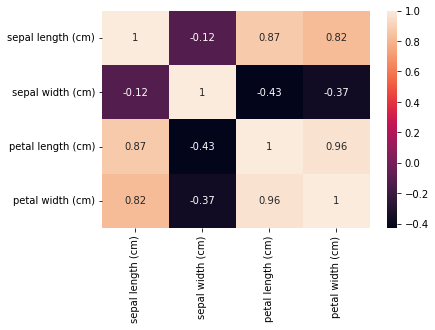

In [ ]:
# plot the heatmap
sns.heatmap(corr, annot=True)
plt.show()

> In this context, I will be talking about correlation as a measure of dependence. Some of the features that seem to be highly dependent are:
*   Petal length and width,
*   Sepal length and petal length, and
*   Sepal length and petal length

> The least correlated variables are: Sepal width and length.

For a simpler visualisation of the elements, I've included a picture below.

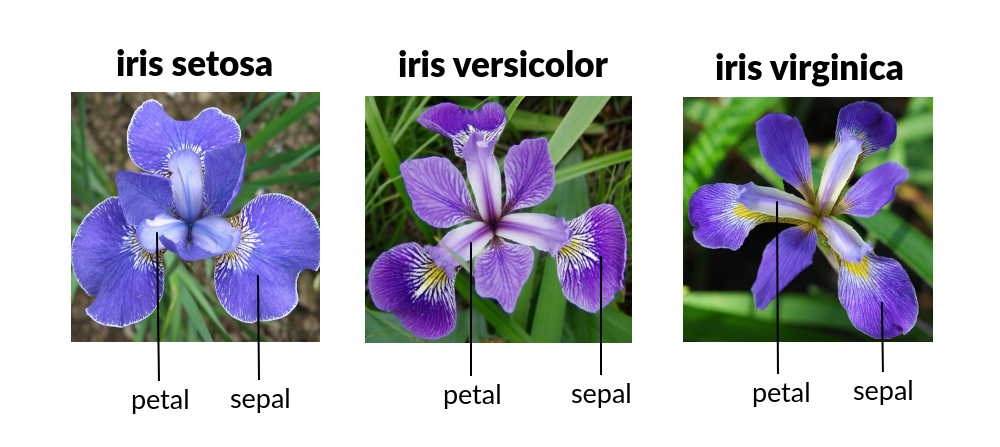

## 6) Graph
If we assign the following numerical values: Setosa=0, Versicolour=1, and
Virginica=2 and we propose the following causal model:

>Sepal Length -> Sepal Width -> Plant Type <- Petal Width <- Petal Length


### Question a) 
Which relation of independence we should expect between Sepal Length and
Petal Length?

Based on the model, we would expect d-separation (uncoditional independence) because the underected path is blocked by the colider (Plant Type). 
 
>  *I(Sepal Length, $\emptyset$, Petal Length)*

However, below, we can see that Sepal Length and Petal Length, when uncoditioned, have a high correlation, which raises the question whether this model is correct.

In [ ]:
corr = df[['sepal length (cm)', 'petal length (cm)']].corr()
print(corr)

                   sepal length (cm)  petal length (cm)
sepal length (cm)           1.000000           0.871754
petal length (cm)           0.871754           1.000000


### Question b) 
And if we condition on Plant type?

If we condition on the Plant Type, the path is no longer blocked (the collider is 'turned on'), then the d-separation is lost:

> *~I(Sepal Length, Plant Type, Petal Length)*

In [ ]:
%%capture
!pip install pingouin
import pingouin as pg

In [ ]:
partial_corr = pg.partial_corr(data=df, x='sepal length (cm)', y='petal length (cm)', covar='sp')
print(partial_corr)

           n         r         CI95%         p-val
pearson  150  0.657821  [0.56, 0.74]  7.931044e-20


### Question c) 
And if we condition on Petal Width?

This uncoditional independence remains if we condition on Petal Width and/or Sepal Width, because the path remains blocked:
*   because of the collider that's turned off
*   addtionally, because conditioning on these 2 non-colliders, turnes them off and 'furher' blocks the path

>*I(Sepal Length, Petal Width, Petal Length)*

>*I(Sepal Length, Sepal Width, Petal Length)*

>*I(Sepal Length, {Petal Width, Sepal Width}, Petal Length)*


In [ ]:
partial_corr = pg.partial_corr(data=df, x='sepal length (cm)', y='petal length (cm)', covar='petal width (cm)')
print(partial_corr)

           n         r         CI95%         p-val
pearson  150  0.542016  [0.42, 0.65]  9.414477e-13


# Version 2

Graph to matrix:

![picture](https://drive.google.com/uc?export=view&id=14U4kWtSyH_58Gt_BKyDndEy-PmKYeVUK)


> This is just an example of how a graph can be transcribed into a matrix. The rows represent the tail and the columns the head of the arrow that connects the vertices.

> For example, in row P there is a 1 in column R. This means that the arrow points from P to R. ( P -> R )

## Problem 1. 
Program a function that given a causal graph (in matrix form) computes the basis set of independences to be checked to assert if that graph is a feasible causal structure.


Figure from the book, explaining how to do this manually.

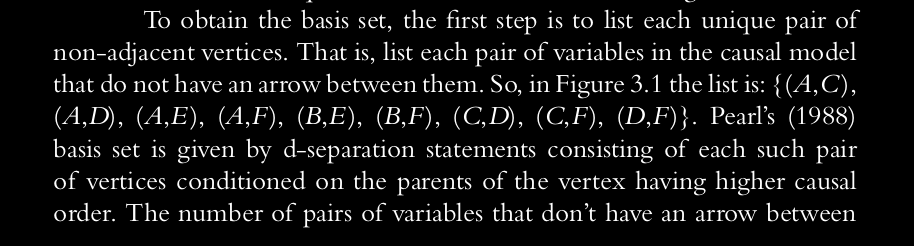

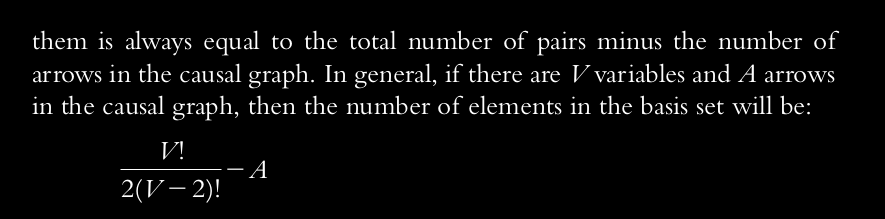


> My gerenal idea here is to go though all the rows and see which do not have a 1 (have a 0), both in [i][q] and [q][i] order. These pair of vertices do not have an arrow betwen them - are non-adjacent. Also any vetex does not point to itself (ex. A->A), so for [i][i] the value is 0, but this is not what we want so we skip the diagonal elements of the matrix.

> For example in the row if ther is 0 in column B, then A is not pointing to B. But B might be pointing to A - we would be able to see this in column A of row B. That's why I check both [i][q] and [q][i]. 

> From these I create a key variable that will later be stored in ta dictionary. 

> Then, where if found the 0, I look into that colum to see if there are any rows with 1-s. If I find any, this would mean that there vertices (rows) are pointing to that column, ei. are the parent. These parents, if found, are then what the pair of vertices are conditioned on. The parentes are stored in a set variable called indicies and are added as a value of the key in the final dictionary. The set is added for A->B and B->A, because both the parents of A and the parents of B are what the pair {A, B} needs to be conditioned on.

> The dictionary is created and returned (to be able to be used in problem 2) and, if verbose is set to True, in the stdout a table is printed for easy of visualisation.


In [ ]:
def get_basis_set_from_matrix(matrix, verbose=True):

  # get the number of rows and columns, even thought the matrix should be a square
  num_rows = len(matrix)
  num_cols = len(matrix[0])

  # creating the final dictonary 
  grand_dict = {}

  # loop through rows
  for i in range(num_rows):

      # loop through columns greater than i
      for j in range(num_cols):

          # check if value is not 1 both i,j and j,i  ; and that it's not an i,i element
          if matrix[i][j] != 1 and i != j and matrix[j][i] != 1:

              # create a key of the alphabetical value of the row and col number (ex. 1,2 -> A,B)
              key = sorted([chr(i+65), chr(j+65)])

              # empty set of indicies (parents)              
              indicies = set()

              # for every row in that column where the 0 was found, if there are any 1:
              if any(matrix[k][j] == 1 for k in range(num_rows)):

                  # go through the rows
                  for k in range(num_rows):

                      # if in a row there is a 1
                      if matrix[k][j] == 1:

                          # add the alpabetical value of that row to the parents set
                          indicies = indicies.union(set(str(chr(k+65))))
              
              # if the pair of vertices has be previously recorded, then
              if str(key) in grand_dict:
                  # update the parents - adding the new parents
                  grand_dict[str(key)] = grand_dict[str(key)].union(indicies)

              # if this is the first time the pair is observed
              else:
                  # then create that item in the dictionary
                  grand_dict.update({str(key):indicies}) 

  # create the header of the table
  columns = ['Non-adjacent variables', 'Parent variables of either', 'd-separation statement']
  
  # and and empty list for the rows
  rows = []

  # for every item in the dictioanry
  for i in grand_dict:

    # the pair of vertices is set
    nav = i[2] + ', '+ i[7]

    # the parents are extracted
    all = ''
    for n in grand_dict[i]:
      all = all + n + ', ' 

    d_sep = i[2] + ' ⊥⊥ ' + i[7]
    if len(all[:-2])>0:
      d_sep += ' | ' + all[:-2].replace(', ', '')
    
    # this all is added to the row
    row = [nav, all[:-2] if len(all[:-2]) > 0 else 'None', d_sep]
    rows.append(row)

  # the table is created and displayed if verbose==True
  res = pd.DataFrame(rows, columns=columns)
  if verbose==True:
    display(res)
  
  # the dictionary is returned
  return grand_dict

### Examples:

#### ex. 1)

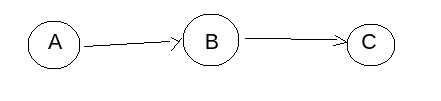

In [ ]:
matrix1 = [[0, 1, 0],
          [0, 0, 1],
          [0, 0, 0]]

In [ ]:
basis_set_dictionary1 = get_basis_set_from_matrix(matrix1)

,Non-adjacent variables,Parent variables of either,d-separation statement
0,"A, C",B,A ⊥⊥ C | B


In [ ]:
basis_set_dictionary1

{"['A', 'C']": {'B'}}

#### ex. 2)


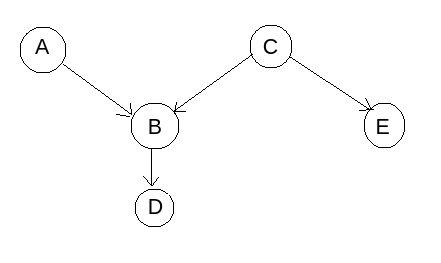

In [ ]:
matrix2 = [[0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0],
          [0, 1, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]]

In [ ]:
basis_set_dictionary2 = get_basis_set_from_matrix(matrix2)

,Non-adjacent variables,Parent variables of either,d-separation statement
0,"A, C",None,A ⊥⊥ C
1,"A, D",B,A ⊥⊥ D | B
2,"A, E",C,A ⊥⊥ E | C
3,"B, E","C, A",B ⊥⊥ E | CA
4,"C, D",B,C ⊥⊥ D | B
5,"D, E","C, B",D ⊥⊥ E | CB


In [ ]:
basis_set_dictionary2

{"['A', 'C']": set(),
 "['A', 'D']": {'B'},
 "['A', 'E']": {'C'},
 "['B', 'E']": {'A', 'C'},
 "['C', 'D']": {'B'},
 "['D', 'E']": {'B', 'C'}}

#### ex. 3)


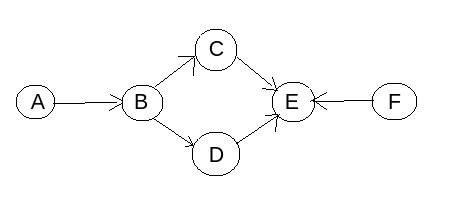

In [ ]:
matrix3 = [[0, 1, 0, 0, 0, 0],
          [0, 0, 1, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1, 0]]

In [ ]:
basis_set_dictionary3 = get_basis_set_from_matrix(matrix3)

,Non-adjacent variables,Parent variables of either,d-separation statement
0,"A, C",B,A ⊥⊥ C | B
1,"A, D",B,A ⊥⊥ D | B
2,"A, E","C, D, F",A ⊥⊥ E | CDF
3,"A, F",None,A ⊥⊥ F
4,"B, E","C, D, F, A",B ⊥⊥ E | CDFA
5,"B, F",A,B ⊥⊥ F | A
6,"C, D",B,C ⊥⊥ D | B
7,"C, F",B,C ⊥⊥ F | B
8,"D, F",B,D ⊥⊥ F | B


In [ ]:
basis_set_dictionary3

{"['A', 'C']": {'B'},
 "['A', 'D']": {'B'},
 "['A', 'E']": {'C', 'D', 'F'},
 "['A', 'F']": set(),
 "['B', 'E']": {'A', 'C', 'D', 'F'},
 "['B', 'F']": {'A'},
 "['C', 'D']": {'B'},
 "['C', 'F']": {'B'},
 "['D', 'F']": {'B'}}

## Problem 2. 
Program a function that given a basis set and data for all the variables computes the independences given the data (using Pearson Correlation) and returns True if the independences are observed. The threshold of correlation to consider independent or dependent two variables is a parameter of the function.

Figure from the book, I will reference this later in the code: 

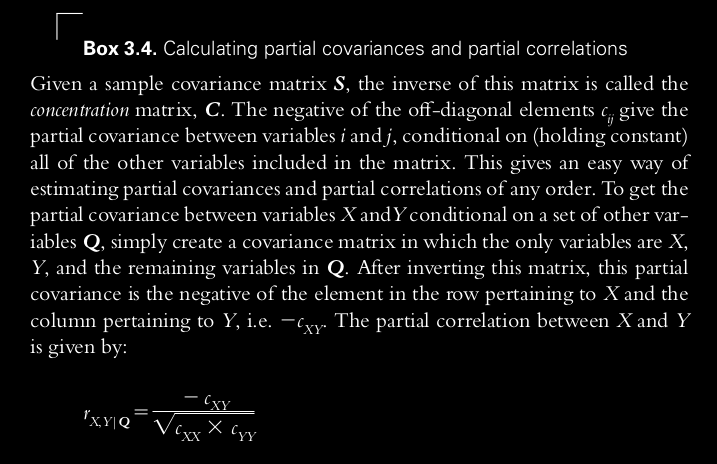

> My general idea for this is first see if the matrix and the data correspond. If the graph has 7 vertices, the data should have 7 variables. If they don't the program breaks, however if the user want's they can force the program by setting force = True (even though it's a bad idea).

> Then, we go though every element of the dictionary from problem 1 and we see if it's a conditioned or unconditioned d-separation.

> If it's an unconditional independence, then just a basic Pearson Correlation is calculated. We expect it to a value around 0 - because the variables should be independent - not correlated. 

> If it's a conditional independence, then the method prescribed in the book is followed. A covariance matrix of the pair of verteces and their parents is created. Then it's inverted, and the partial correlation is calculated with the formula above. 

> One thing to keep in mind here is that in the input data there can not be a pure linear combination of variables (for examlpe: petal length = 5 x petal width + 4 x sepal length). This is because this results in a covariance matrix which is singular and the inverse cannot be calculated from it - we need a full rank matrix for the inverse. In such a case, the program chashes. 

> Moving ont to the threshold. The treshold can set by the user, but the default is 0.2. In the stdout (if verbose = True) a table is printed. In the table, for every d-separation statement the correlation (Pearson or partial) is printed along with a 'passed treshold' parameter. If the correlation <= treshold this is True, if not it's False. The logic behid this is: if the correlation is low, then the variables are (conditionally) independant. Then all of these True/False statements are looked at. If all are True then the model is goos - all the predicted d-sep statments are true - and, so, the program returns True. However, if there is only 1 False, then the program returns False.

> Finally, the user can set whether they want to see the summary table with the verbose True/False parameter of the funciton. Also, they can chose whether they want to see the covariance and inverse of the covariance matrices for every d-sep statement by chaning the display_details_of_analysis parameter to True/False.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def threshold_TF_given_data_and_matrix_dictonary_func(data, 
                                                      dictionary_from_get_basis_set_from_matrix, 
                                                      threshold = 0.2, 
                                                      force = False,
                                                      verbose = True,
                                                      display_details_of_analysis=False):
  
  # First I check if the data shape matches the matrix shape

  grand_dict = dictionary_from_get_basis_set_from_matrix
  random_data = data
  list_of_letters_of_columns = []

  for i in grand_dict:
    list_of_letters_of_columns.append(i[2])
    list_of_letters_of_columns.append(i[7])
  list_of_letters_of_columns.sort(reverse=True)
  highest = list_of_letters_of_columns[1]
  needed_num_of_columns = ord(highest.upper()) - 64

  if needed_num_of_columns == len(random_data.columns):
    print('Data shape matches matrix shape - all is good!')
  else: 
    if force == True:
      print("WARNING: DATA DOESN'T MATCH UP!")
    else:
      print('The matrix and the data do not match up. \n\
      Make sure that you are using the output of the get_basis_set_from_matrix function as the input for the basis set.\n\
      Make sure that you are using the data corresponds to that matrix.')
      exit(1)

  # the treshold is printed

  print("TRESHOLD for correlation value: ", threshold)

  all_True_or_False = []

  columns = ['d-separation statement', 'Correlation value', 'Passed treshold']
  rows = []

  # I go though every item in the dictionary with the d-sep statements
  for i in grand_dict:

    row = []

    # I extract some information from the dictionarry
    col1 = i[2]
    col2 = i[7]

    all = ''
    for n in grand_dict[i]:
      all = all + n + ', ' 
    d_sep = col1 + ' ⊥⊥ ' + col2
    if len(all[:-2])>0:
      d_sep += ' | ' + all[:-2].replace(', ', '')
    row.append(d_sep)

    var1 = ord(i[2].upper()) - 1 - 64
    var2 = ord(i[7].upper()) - 1 - 64

    x_and_y_col_names = [random_data.columns[i] for i in [var1, var2]]

    # if the indicies is an empty set, then the pair of vertices should be unconditionally independant,
    # so in this case I do a classic Pearson correlation
    if grand_dict[i] == set():
      corr_coef = random_data[x_and_y_col_names[0]].corr(random_data[x_and_y_col_names[1]])

      # i see if the correlation value passes the treshold and get a True/False statement from that
      if abs(corr_coef) <= abs(threshold):
        t_o_f = True
      else: 
        t_o_f = False

      all_True_or_False.append(t_o_f)
      row.append(corr_coef)
      row.append(t_o_f)
      if display_details_of_analysis == True:
        print(f'\n\n==========================================\n\
        Pearson correlation for {x_and_y_col_names} ; correlation : {corr_coef} ; passed : {t_o_f}')

    # in case the indicies is not an empty set, then the pair are conditionally independant,
    # so I perform a partial correlation based on the instructions given in the text above (picture from book)
    else:

      all = []

      for n in grand_dict[i]:
        str_to_int = ord(n.upper()) - 1 - 64
        all.append(str_to_int)
      given = [random_data.columns[i] for i in all]
      all.append(var1)
      all.append(var2)

      col_names = [random_data.columns[i] for i in all]
      fields_of_interest = col_names

      # Calculate the covariance matrix
      cov_matrix = random_data[fields_of_interest].cov()

      # Calculate the inverse of the covariance matrix
      inv_cov_matrix = pd.DataFrame(np.linalg.inv(cov_matrix.values), 
                                    index=cov_matrix.columns, 
                                    columns=cov_matrix.index)

      # Calculating the coef
      C_X = round(inv_cov_matrix.loc[x_and_y_col_names[0],x_and_y_col_names[0]],6)
      C_Y = round(inv_cov_matrix.loc[x_and_y_col_names[1],x_and_y_col_names[1]],6)
      C_XY = round(inv_cov_matrix.loc[x_and_y_col_names[0],x_and_y_col_names[1]],6)

      R = round( C_XY*(-1) / (C_X * C_Y)**(1/2) , 6) 

      # seing if it passes the treshold
      if abs(R) <= abs(threshold):
        t_o_f = True
      else: 
        t_o_f = False

      # displaying the analysis step by step if display_details_of_analysis == True
      if display_details_of_analysis == True:
        print(f'\n\n==========================================\n\
        Partial correlation for {x_and_y_col_names} given {given}')
        print('Covariance matrix:')
        display(cov_matrix)
        print('\nInverse of covariance matrix (concentration matrix):')
        display(inv_cov_matrix)
        print( f'\nC_X : {C_X} ; C_Y : {C_Y} ; C_XY : {C_XY} ; R : {R} ; passed : {t_o_f}')

      all_True_or_False.append(t_o_f)
      row.append(R)
      row.append(t_o_f)

    rows.append(row)

  if display_details_of_analysis == True:
    print("\n\n==========================================\n\n\
    =============Final Results=================")

  # constructing the summary table and displaying the results
  res = pd.DataFrame(rows, columns=columns)
  if verbose == True:
    display(res)

  # the function returs a singular True or False;
  # if all the correlations are less then a given treshold (the d-sep statements are trully independat) and so the fucntion returns True = the model is good
  # if at least one correlation is more than the treshold, then there is more dependance then the user would like, so the fucntion returns False = the model is 'bad'
  
  for i in all_True_or_False:
    if i == False:
      print('At least one statement does not pass the treshold --> returning False')
      return False
      # break
  return True

### Examples:


#### ex. 1)

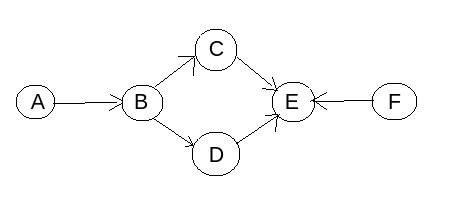

the values were randomly assigned

$A = N(0,10)$

$B = 27*A$

$C = 3*B$

$D = 41*B$

$F = N(70, 10)$

$E = 5*C + 14*D + 17*F$

In [ ]:
matrix3 = [[0, 1, 0, 0, 0, 0],
          [0, 0, 1, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1, 0]]

basis_set3 = get_basis_set_from_matrix(matrix3, verbose = False)

##### With random data

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
data = np.random.randn(30, 6)

# Create DataFrame
random_data = pd.DataFrame(data, columns=['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6'])

# Print DataFrame
random_data.head(3)


,Column1,Column2,Column3,Column4,Column5,Column6
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137
1,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730
2,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247


In [ ]:
return_value_random_data = threshold_TF_given_data_and_matrix_dictonary_func(data = random_data, 
                                                                             dictionary_from_get_basis_set_from_matrix = basis_set3,
                                                                             threshold = 0.2,
                                                                             verbose = True)

Data shape matches matrix shape - all is good!
TRESHOLD for correlation value:  0.2


,d-separation statement,Correlation value,Passed treshold
0,A ⊥⊥ C | B,-0.028438,True
1,A ⊥⊥ D | B,0.172430,True
2,A ⊥⊥ E | CDF,-0.051685,True
3,A ⊥⊥ F,0.293858,False
4,B ⊥⊥ E | CDFA,0.024067,True
5,B ⊥⊥ F | A,-0.074904,True
6,C ⊥⊥ D | B,-0.010564,True
7,C ⊥⊥ F | B,0.008639,True
8,D ⊥⊥ F | B,-0.089914,True


At least one statement does not pass the treshold --> returning False


In [ ]:
return_value_random_data

False

##### With data generated for the model

In [ ]:
# set the random seed for reproducibility
np.random.seed(42)

size = 100
# generate values for column A and F
A = np.random.normal(0, 10, size = size)
F = np.random.normal(70, 10, size = size)
# F = A

# compute values for columns B, C, D and E
B = 27 * A + np.random.uniform(0, 50, size = size)
C = 3 * B + np.random.uniform(150, 200, size = size)
D = 41 * B + np.random.uniform(250, 300, size = size)
E = 5 * C + 14 * D + 17 * F + np.random.uniform(900, 1000, size = size)

# create a pandas dataframe with the specified columns
modeled_data = pd.DataFrame({'A': A, 'B': B, 'C': C, 'D': D, 'E': E, 'F': F})

# print the dataframe
modeled_data.head()


,A,B,C,D,E,F
0,4.967142,177.981475,731.017665,7595.349099,111874.421438,55.846293
1,-1.382643,-0.292930,168.426341,256.733381,6513.881107,65.793547
2,6.476885,209.726692,827.239605,8863.079990,130290.280825,66.572855
3,15.230299,446.342265,1534.294328,18593.462839,269977.311745,61.977227
4,-2.341534,-45.246854,24.048996,-1593.941206,-20041.934610,68.387143


In [ ]:
return_value_random_data = threshold_TF_given_data_and_matrix_dictonary_func(data = modeled_data, 
                                                                             dictionary_from_get_basis_set_from_matrix = basis_set3,
                                                                             threshold = 0.20,
                                                                             verbose = True,
                                                                             display_details_of_analysis=False)

Data shape matches matrix shape - all is good!
TRESHOLD for correlation value:  0.2


,d-separation statement,Correlation value,Passed treshold
0,A ⊥⊥ C | B,-0.020937,True
1,A ⊥⊥ D | B,0.105202,True
2,A ⊥⊥ E | CDF,-0.071130,True
3,A ⊥⊥ F,-0.136422,True
4,B ⊥⊥ E | CDFA,0.003350,True
5,B ⊥⊥ F | A,0.105619,True
6,C ⊥⊥ D | B,-0.051033,True
7,C ⊥⊥ F | B,-0.026910,True
8,D ⊥⊥ F | B,-0.027230,True


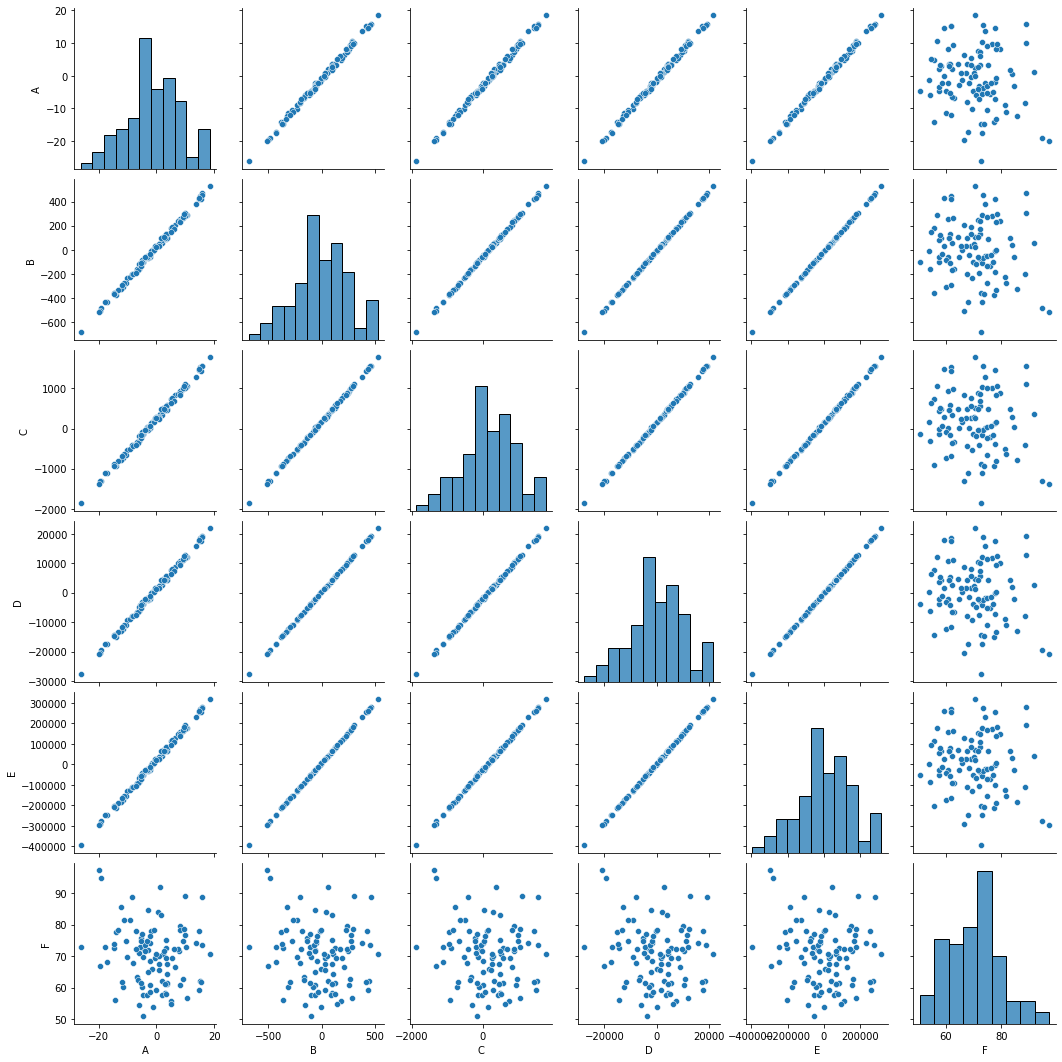

In [ ]:
sns.pairplot(modeled_data)

#### ex. 2)


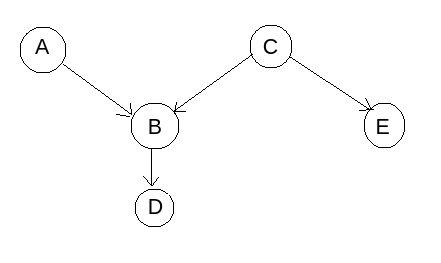

$A = N(0,1)$

$C = N(100,15)$

$B = 7*A + 0.24*C$

$D = 15*B$

$E = 0.5*C$

In [ ]:
matrix2 = [[0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0],
          [0, 1, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]]

basis_set2 = get_basis_set_from_matrix(matrix2)

,Non-adjacent variables,Parent variables of either,d-separation statement
0,"A, C",None,A ⊥⊥ C
1,"A, D",B,A ⊥⊥ D | B
2,"A, E",C,A ⊥⊥ E | C
3,"B, E","C, A",B ⊥⊥ E | CA
4,"C, D",B,C ⊥⊥ D | B
5,"D, E","C, B",D ⊥⊥ E | CB


##### With data generated for the model

In [ ]:
# set the random seed for reproducibility
np.random.seed(42)

size = 100
# generate values for column A and F
A = np.random.normal(0, 1, size = size)
C = np.random.normal(100, 15, size = size)

# compute values for columns B, C, D and E
B = 7 * A + 0.24 *C + np.random.uniform(0, 50, size = size)
D = 15 * B + np.random.uniform(250, 300, size = size)
E = 0.5 * C + np.random.uniform(900, 1000, size = size)

# create a pandas dataframe with the specified columns
modeled_data2 = pd.DataFrame({'A': A, 'B': B, 'C': C, 'D': D, 'E': E})

# print the dataframe
modeled_data2.head()


,A,B,C,D,E
0,0.496714,66.250318,78.769439,1290.828010,1035.601974
1,-0.138264,58.556258,93.690320,1147.648996,984.332218
2,0.647689,62.150835,94.859282,1230.322047,976.000850
3,1.523030,66.897215,87.965841,1298.725757,1030.842833
4,-0.234153,39.754855,97.580714,856.112387,971.149941


In [ ]:
return_value_random_data2 = threshold_TF_given_data_and_matrix_dictonary_func(data = modeled_data2, 
                                                                             dictionary_from_get_basis_set_from_matrix = basis_set2,
                                                                             threshold = 0.20,
                                                                             verbose = True,
                                                                             display_details_of_analysis=False)

Data shape matches matrix shape - all is good!
TRESHOLD for correlation value:  0.2


,d-separation statement,Correlation value,Passed treshold
0,A ⊥⊥ C,-0.136422,True
1,A ⊥⊥ D | B,0.119480,True
2,A ⊥⊥ E | C,0.002800,True
3,B ⊥⊥ E | CA,-0.103017,True
4,C ⊥⊥ D | B,-0.064280,True
5,D ⊥⊥ E | CB,-0.044562,True


In [ ]:
return_value_random_data2

True

##### Displaying all covarance and concentration matrices

In [ ]:
return_value_random_data2 = threshold_TF_given_data_and_matrix_dictonary_func(data = modeled_data2, 
                                                                             dictionary_from_get_basis_set_from_matrix = basis_set2,
                                                                             threshold = 0.20,
                                                                             verbose = True,
                                                                             display_details_of_analysis=True)

Data shape matches matrix shape - all is good!
TRESHOLD for correlation value:  0.2


        Pearson correlation for ['A', 'C'] ; correlation : -0.13642221217000247 ; passed : True


        Partial correlation for ['A', 'D'] given ['B']
Covariance matrix:


,B,A,D
B,240.545661,4.968671,3624.724693
A,4.968671,0.824770,76.480660
D,3624.724693,76.480660,54871.257852



Inverse of covariance matrix (concentration matrix):


,B,A,D
B,0.916344,0.106596,-0.060681
A,0.106596,1.404829,-0.009000
D,-0.060681,-0.009000,0.004039



C_X : 1.404829 ; C_Y : 0.004039 ; C_XY : -0.009 ; R : 0.11948 ; passed : True


        Partial correlation for ['A', 'E'] given ['C']
Covariance matrix:


,C,A,E
C,204.634012,-1.772313,90.399172
A,-1.772313,0.824770,-0.705581
E,90.399172,-0.705581,989.422091



Inverse of covariance matrix (concentration matrix):


,C,A,E
C,0.005186,0.010745,-0.000466
A,0.010745,1.235462,-0.000101
E,-0.000466,-0.000101,0.001053



C_X : 1.235462 ; C_Y : 0.001053 ; C_XY : -0.000101 ; R : 0.0028 ; passed : True


        Partial correlation for ['B', 'E'] given ['C', 'A']
Covariance matrix:


,C,A,B,E
C,204.634012,-1.772313,58.099440,90.399172
A,-1.772313,0.824770,4.968671,-0.705581
B,58.099440,4.968671,240.545661,-17.147730
E,90.399172,-0.705581,-17.147730,989.422091



Inverse of covariance matrix (concentration matrix):


,C,A,B,E
C,0.005896,0.024000,-0.001960,-0.000556
A,0.024000,1.482703,-0.036549,-0.001769
B,-0.001960,-0.036549,0.005403,0.000247
E,-0.000556,-0.001769,0.000247,0.001064



C_X : 0.005403 ; C_Y : 0.001064 ; C_XY : 0.000247 ; R : -0.103017 ; passed : True


        Partial correlation for ['C', 'D'] given ['B']
Covariance matrix:


,B,C,D
B,240.545661,58.099440,3624.724693
C,58.099440,204.634012,861.425493
D,3624.724693,861.425493,54871.257852



Inverse of covariance matrix (concentration matrix):


,B,C,D
B,0.914459,-0.005717,-0.060318
C,-0.005717,0.005268,0.000295
D,-0.060318,0.000295,0.003998



C_X : 0.005268 ; C_Y : 0.003998 ; C_XY : 0.000295 ; R : -0.06428 ; passed : True


        Partial correlation for ['D', 'E'] given ['C', 'B']
Covariance matrix:


,C,B,D,E
C,204.634012,58.099440,861.425493,90.399172
B,58.099440,240.545661,3624.724693,-17.147730
D,861.425493,3624.724693,54871.257852,-286.973580
E,90.399172,-17.147730,-286.973580,989.422091



Inverse of covariance matrix (concentration matrix):


,C,B,D,E
C,0.005524,-0.005137,0.000250,-0.000521
B,-0.005137,0.915776,-0.060420,-0.001184
D,0.000250,-0.060420,0.004006,0.000092
E,-0.000521,-0.001184,0.000092,0.001064



C_X : 0.004006 ; C_Y : 0.001064 ; C_XY : 9.2e-05 ; R : -0.044562 ; passed : True



    =============Final Results=================


,d-separation statement,Correlation value,Passed treshold
0,A ⊥⊥ C,-0.136422,True
1,A ⊥⊥ D | B,0.119480,True
2,A ⊥⊥ E | C,0.002800,True
3,B ⊥⊥ E | CA,-0.103017,True
4,C ⊥⊥ D | B,-0.064280,True
5,D ⊥⊥ E | CB,-0.044562,True


----
 end of notebook